# Compares GPR performance on different RAC depth combinations for $\Delta G_{O(IV)^{*}} - \Delta G_{HO(III)^{*}}$. Also, then uses 3, 0 for the GPR on $\Delta G_{O(V)^{*}} - \Delta G_{O(IV)^{*}}$

In [1]:
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import pickle
from collections import defaultdict


In [2]:
ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

def run_gpr(training_racs, oer_descriptors, figname, cat_names, extra_ox=False):
    stdzz = []
    preds = []
    test_vals = []
    errs = []
    
    # leave one out cross validation
    loo = LeaveOneOut()
    loo.get_n_splits(racs)
    for train_index, test_index in loo.split(training_racs, oer_descriptors):
        sc = StandardScaler()
        X_train, X_test = training_racs[train_index], training_racs[test_index]
        y_train, y_test = np.asarray(oer_descriptors)[train_index], np.asarray(oer_descriptors)[test_index]
        scaled_X_train = sc.fit_transform(X_train)
        scaled_X_test = sc.transform(X_test)
        kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3))
        gp = GaussianProcessRegressor(kernel=kernel, alpha=.01, n_restarts_optimizer=20)
        gp.fit(scaled_X_train, y_train)
        pred, std = gp.predict(scaled_X_test, return_std=True)
        stdzz.append(std[0])
        preds.append(pred[0])
        errs.append(abs(y_test[0]-pred[0]))
        test_vals.append(y_test[0])
    plt.figure(figsize=(9, 7))
    for name, p, val, std in zip(cat_names, preds, oer_descriptors, stdzz):
        plt.errorbar(p, val, xerr=std, fmt='o', color=ele2color[name[:2]], markersize=10, alpha=0.5)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    if extra_ox:
        # Predefined sets of plotting directives dependent on which redox event we plot.
        plt.xlabel("Predicted $\Delta{G_{O(V)*}} - \Delta{G_{O(IV)*}}$ (eV)", fontsize=16)
        plt.ylabel("DFT $\Delta{G_{O(V)*}} - \Delta{G_{O(IV)*}}$ (eV)", fontsize=16)
        plt.plot([-.25, 2.4], [-.25, 2.4], 'k--')
        plt.xlim(-.25, 2.4)
        plt.ylim(-.25, 2.4)
    else:
        # Predefined sets of plotting directives dependent on which redox event we plot.
        plt.xlabel("Predicted $\Delta{G_{O(IV)*}} - \Delta{G_{HO(III)*}}$ (eV)", fontsize=16)
        plt.ylabel("DFT $\Delta{G_{O(IV)*}} - \Delta{G_{HO(III)*}}$ (eV)", fontsize=16)
        plt.plot([0.5, 2.5], [0.5, 2.5], 'k--')
        plt.xlim(0.81, 2.19)
        plt.ylim(0.81, 2.19)
    plt.text(1.5, 0.9, s="MAE: {:.2f}".format(np.mean(abs(np.asarray(test_vals)-np.asarray(preds))), fontsize=14))
    print("RMSE: {:.2f}".format(math.sqrt(mean_squared_error(np.asarray(test_vals), np.asarray(preds)))))
    plt.show()



RMSE: 0.09


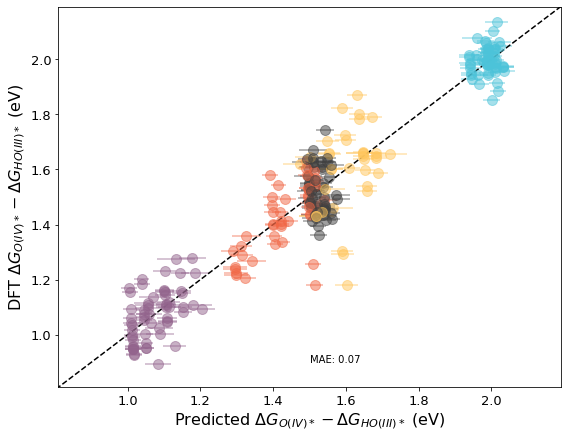

In [3]:
oer_desc_data = pickle.load(open("racs_and_desc/data_mc2_lc0.p", "rb"))

oer_desc_vals = []
racs = []
catalyst_names = []

for name in oer_desc_data:
    oer_desc_vals.append(oer_desc_data[name][0])
    racs.append(oer_desc_data[name][1])
    catalyst_names.append(name)
racs = np.asarray(racs)

run_gpr(racs, oer_desc_vals, "mc2lc0_gpr.pdf", catalyst_names)

/home/michael/anaconda3/envs/molSimplify/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


RMSE: 0.09


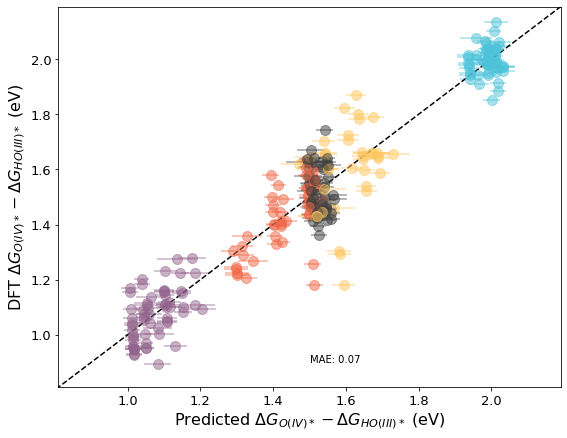

In [4]:
oer_desc_data = pickle.load(open("racs_and_desc/data_mc2_lc1.p", "rb"))

racs = []

for name in oer_desc_data:
    racs.append(oer_desc_data[name][1])
racs = np.asarray(racs)
run_gpr(racs, oer_desc_vals, "mc2lc1_gpr.pdf", catalyst_names)

/home/michael/anaconda3/envs/molSimplify/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


RMSE: 0.08


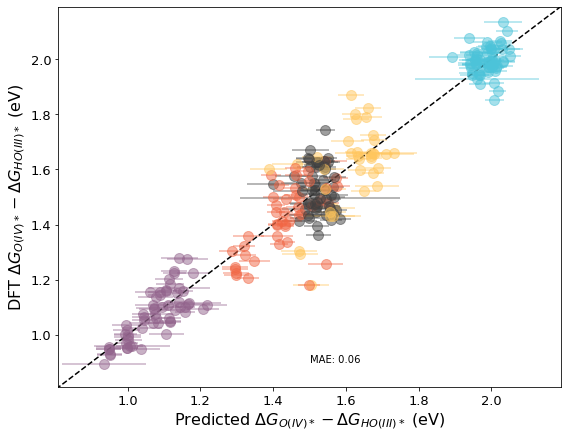

In [5]:
oer_desc_data = pickle.load(open("racs_and_desc/data_mc3_lc0.p", "rb"))

racs = []

for name in oer_desc_data:
    racs.append(oer_desc_data[name][1])
racs = np.asarray(racs)
run_gpr(racs, oer_desc_vals, "mc3lc0_gpr.pdf", catalyst_names)

/home/michael/anaconda3/envs/molSimplify/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)


RMSE: 0.08


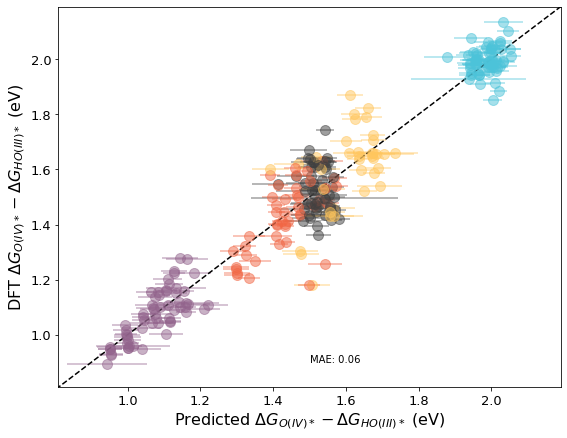

In [6]:
oer_desc_data = pickle.load(open("racs_and_desc/data_mc3_lc1.p", "rb"))

racs = []

for name in oer_desc_data:
    racs.append(oer_desc_data[name][1])
racs = np.asarray(racs)
run_gpr(racs, oer_desc_vals, "mc3lc1_gpr.pdf", catalyst_names)

/home/michael/anaconda3/envs/molSimplify/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)
/home/michael/anaconda3/envs/molSimplify/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  _check_optimize_result("lbfgs", opt_res)
/home/michael/anaconda3/envs/molSimplify/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter

RMSE: 0.08


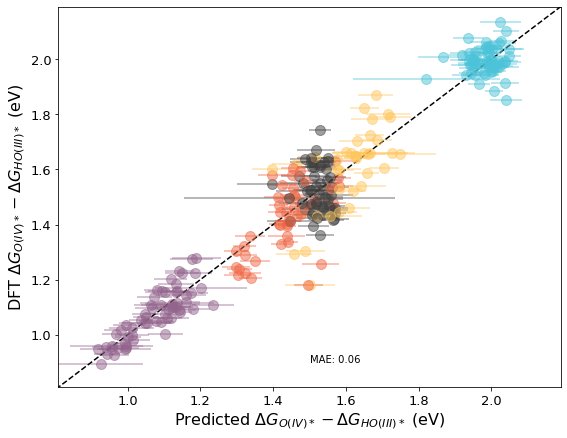

In [7]:
oer_desc_data = pickle.load(open("racs_and_desc/data_mc4_lc0.p", "rb"))

racs = []

for name in oer_desc_data:
    racs.append(oer_desc_data[name][1])
racs = np.asarray(racs)
run_gpr(racs, oer_desc_vals, "mc4lc0_gpr.pdf", catalyst_names)

RMSE: 0.08


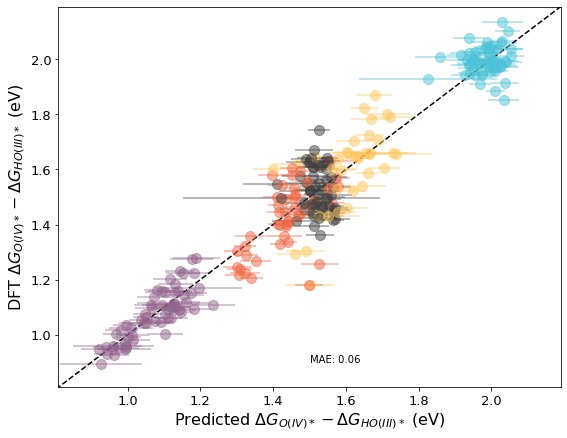

In [8]:
oer_desc_data = pickle.load(open("racs_and_desc/data_mc4_lc1.p", "rb"))

racs = []

for name in oer_desc_data:
    racs.append(oer_desc_data[name][1])
racs = np.asarray(racs)
run_gpr(racs, oer_desc_vals, "mc4lc1_gpr.pdf", catalyst_names)

Now we analyse the extra oxidation descriptor for metal-centered depth of 3 and ligand-centered depth of 0

RMSE: 0.21


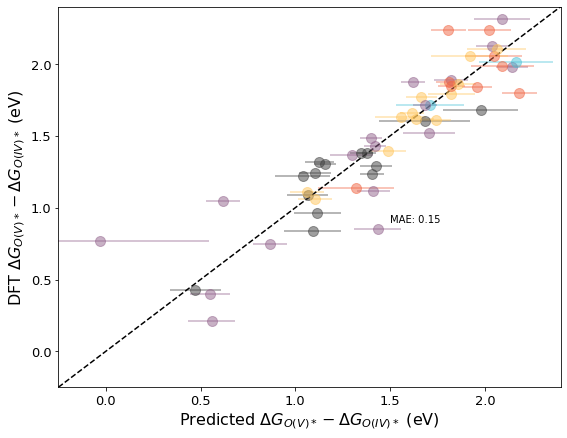

In [9]:
extra_ox_desc = pickle.load(open("extra_ox_desc.p", "rb"))
# need to revert back to mc=3, lc=0, to keep consisent racs as in the OER descriptor
# gpr
oer_desc_data = pickle.load(open("racs_and_desc/data_mc3_lc0.p", "rb"))

racs = []
extra_ox_descriptors = []
extra_ox_names = []
for name in extra_ox_desc:
    try:
        # can grab the racs from this data structure
        racs.append(oer_desc_data[name][1])
        extra_ox_descriptors.append(extra_ox_desc[name])
        extra_ox_names.append(name)
    except KeyError:
        pass
racs = np.asarray(racs)
run_gpr(racs, extra_ox_descriptors, "extra_ox_gpr.pdf", extra_ox_names, extra_ox=True)